In [123]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import cvxpy as cp
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

/var/folders/4m/rxd9grt91hq7n4__bqp6nkvr0000gn/T/ipykernel_22683/1659410565.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### Data load

In [124]:
NUM = 200

# df_ori = pd.read_csv('./data/adjclose_10.csv', sep=',')
# df_ori['cash'] = 1
# df_ori = pd.read_csv('./data/adjclose_100.csv', sep=',')
df_ori = pd.read_csv('./data/adjclose_200.csv', sep=',')
# df_ori = pd.read_csv('./data/adjclose_390.csv', sep=',')
df_ori.head()

,Date,A,AAPL,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,...,VRTX,VZ,WELL,WFC,WM,WMB,WMT,XEL,XOM,YUM
0,2003-12-01,17.187069,0.328628,12.641929,18.253561,21.010981,31.728962,9.004882,19.435574,11.598775,...,9.36,11.135653,12.271651,16.427296,16.882130,3.590292,36.405937,7.796231,18.915047,8.857176
1,2003-12-02,16.895353,0.326054,12.717796,18.476860,20.571693,31.486843,9.113220,19.485495,11.822786,...,9.21,11.067694,12.180751,16.262308,16.853273,3.623399,35.417286,7.870522,18.972231,8.824399
2,2003-12-03,17.199223,0.318334,12.723413,18.714573,20.796331,31.091835,9.196074,19.195944,12.006972,...,8.88,10.955554,12.135300,16.142841,16.997564,3.579256,35.196842,7.898385,18.993019,8.804230
3,2003-12-04,17.010824,0.320151,12.743077,18.440844,20.791338,30.932556,9.336273,19.400631,11.972126,...,9.10,11.298762,12.128310,16.191196,16.887899,3.656505,35.417286,7.921602,19.242516,8.768931
4,2003-12-05,16.360537,0.315609,12.633501,18.246351,19.418560,30.046946,9.304410,19.400631,11.713270,...,9.21,11.349741,12.177258,16.157064,16.622402,3.575577,35.724564,7.847307,19.117771,8.549584


In [125]:
df_ori.set_index('Date', inplace=True)
df_ori = df_ori.dropna(axis=1)
df_ori.index = pd.DatetimeIndex(df_ori.index)
# ENDTIME = pd.to_datetime('2008-12-31')
# df_ori = df_ori.loc[df_ori.index <= ENDTIME]
df_ori.tail()

,A,AAPL,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEP,...,VRTX,VZ,WELL,WFC,WM,WMB,WMT,XEL,XOM,YUM
Date,,,,,,,,,,,,,,,,,,,,,
2023-11-22,123.989998,191.309998,102.699997,333.130005,619.719971,182.669998,74.330002,231.149994,202.660004,78.250000,...,353.230011,37.349998,88.699997,42.779999,171.770004,36.230000,154.669998,60.430000,104.010002,128.332977
2023-11-24,126.620003,189.970001,102.870003,334.040009,619.429993,183.050003,74.300003,230.660004,203.419998,78.500000,...,353.040009,37.410000,89.620003,42.919998,172.009995,36.320000,156.059998,60.520000,104.570000,127.904991
2023-11-27,125.010002,189.789993,102.709999,332.429993,619.270020,183.770004,73.190002,229.160004,202.259995,78.540001,...,350.190002,37.349998,90.120003,43.020000,171.479996,36.389999,156.770004,60.450001,103.959999,127.690002
2023-11-28,124.709999,190.399994,102.059998,332.559998,623.320007,183.199997,74.050003,228.990005,207.369995,79.730003,...,347.040009,37.470001,89.309998,43.369999,169.679993,36.330002,158.639999,60.970001,103.900002,126.389999
2023-11-29,127.589996,189.369995,103.629997,333.339996,617.390015,182.710007,73.190002,229.160004,213.850006,79.220001,...,351.000000,37.759998,88.199997,43.779999,169.740005,36.439999,156.080002,60.000000,102.339996,125.519997


100%|██████████| 200/200 [00:00<00:00, 2990.21it/s]


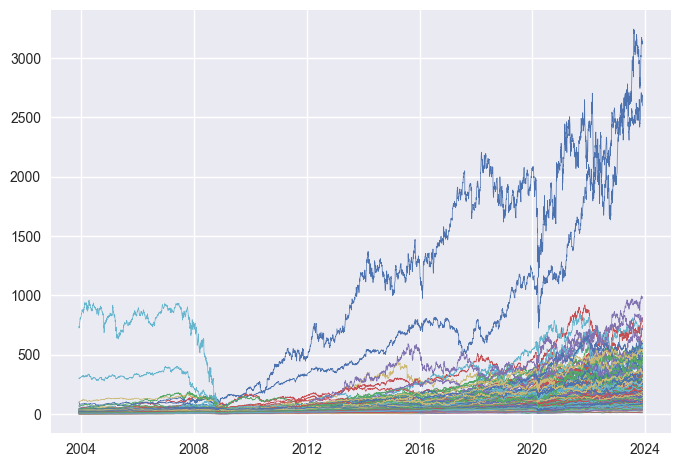

In [126]:
plt.figure()
for stk in tqdm(df_ori.columns):
    plt.plot(df_ori.index, df_ori.loc[:,stk], linewidth=0.5)#, label=stk)
    # plt.legend(loc='best')
# plt.plot(df_ori.index, df_ori.iloc[:,232], linewidth=0.5, label='MNST')
plt.show()

In [127]:

df = df_ori.pct_change().iloc[1:,:]
df['cash']=(1.1)**(1/252)-1
df.head()

,A,AAPL,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEP,...,VZ,WELL,WFC,WM,WMB,WMT,XEL,XOM,YUM,cash
Date,,,,,,,,,,,,,,,,,,,,,
2003-12-02,-0.016973,-0.007831,0.006001,0.012233,-0.020908,-0.007631,0.012031,0.002569,0.019313,0.000000,...,-0.006103,-0.007407,-0.010044,-0.001709,0.009221,-0.027156,0.009529,0.003023,-0.003701,0.000378
2003-12-03,0.017985,-0.023676,0.000442,0.012865,0.010920,-0.012545,0.009092,-0.014860,0.015579,0.004676,...,-0.010132,-0.003731,-0.007346,0.008562,-0.012183,-0.006224,0.003540,0.001096,-0.002286,0.000378
2003-12-04,-0.010954,0.005706,0.001545,-0.014627,-0.000240,-0.005123,0.015245,0.010663,-0.002902,0.007161,...,0.031327,-0.000576,0.002995,-0.006452,0.021582,0.006263,0.002939,0.013136,-0.004009,0.000378
2003-12-05,-0.038228,-0.014187,-0.008599,-0.010547,-0.066026,-0.028630,-0.003413,0.000000,-0.021622,0.009953,...,0.004512,0.004036,-0.002108,-0.015721,-0.022133,0.008676,-0.009379,-0.006483,-0.025014,0.000378
2003-12-08,0.020059,0.009594,0.007784,-0.011054,0.013625,-0.011875,0.015754,-0.004375,-0.001275,-0.007040,...,-0.011677,0.014929,0.007218,0.005208,0.008230,-0.001496,0.013018,0.016857,0.029785,0.000378


In [128]:
df = df.dropna(axis=1)
df.isnull().sum().sum()

0

In [129]:
df.head()

,A,AAPL,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEP,...,VZ,WELL,WFC,WM,WMB,WMT,XEL,XOM,YUM,cash
Date,,,,,,,,,,,,,,,,,,,,,
2003-12-02,-0.016973,-0.007831,0.006001,0.012233,-0.020908,-0.007631,0.012031,0.002569,0.019313,0.000000,...,-0.006103,-0.007407,-0.010044,-0.001709,0.009221,-0.027156,0.009529,0.003023,-0.003701,0.000378
2003-12-03,0.017985,-0.023676,0.000442,0.012865,0.010920,-0.012545,0.009092,-0.014860,0.015579,0.004676,...,-0.010132,-0.003731,-0.007346,0.008562,-0.012183,-0.006224,0.003540,0.001096,-0.002286,0.000378
2003-12-04,-0.010954,0.005706,0.001545,-0.014627,-0.000240,-0.005123,0.015245,0.010663,-0.002902,0.007161,...,0.031327,-0.000576,0.002995,-0.006452,0.021582,0.006263,0.002939,0.013136,-0.004009,0.000378
2003-12-05,-0.038228,-0.014187,-0.008599,-0.010547,-0.066026,-0.028630,-0.003413,0.000000,-0.021622,0.009953,...,0.004512,0.004036,-0.002108,-0.015721,-0.022133,0.008676,-0.009379,-0.006483,-0.025014,0.000378
2003-12-08,0.020059,0.009594,0.007784,-0.011054,0.013625,-0.011875,0.015754,-0.004375,-0.001275,-0.007040,...,-0.011677,0.014929,0.007218,0.005208,0.008230,-0.001496,0.013018,0.016857,0.029785,0.000378


### equally weighted

In [130]:
def equally_weighted(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1 / len(df.columns)] * len(df.columns))
    ret_EW=[]
    # print(cur_stg)

    for i in range(len(df)):
        cur_ret_EW=np.dot(cur_stg, 1 + df.iloc[i,:].values)
        cur_pfl = cur_pfl * cur_ret_EW
        arr_pfl.append(cur_pfl)
        ret_EW.append(cur_ret_EW)

    return arr_pfl,ret_EW

arr_equal, ret_EW= equally_weighted(df)

In [131]:
test_df=pd.DataFrame({'A':[2,0.5,2,0.5],"B":[0.5,2,0.5,2],"C":[1,2,3,4]})
test_df

,A,B,C
0,2.0,0.5,1
1,0.5,2.0,2
2,2.0,0.5,3
3,0.5,2.0,4


### BCRP

In [132]:
#Best constant rebalanced portfolio in hindsight
def BCRP(df):
    x=cp.Variable(len(df.columns),nonneg=True)
    objective=cp.Maximize(cp.sum(cp.log(1+df.values@x)))
    constrains=[cp.sum(x)<=1]
    problem=cp.Problem(objective,constrains)
    result=problem.solve(solver=cp.ECOS)
    weight=x.value
    arr_pfl = [1]
    cur_pfl = 1
    for i in range(len(df)):
        cur_pfl = cur_pfl * np.dot(weight, 1 + df.iloc[i,:].values)
        arr_pfl.append(cur_pfl)
    return weight,arr_pfl
weight_BCRP,arr_BCRP=BCRP(df)
weight_BCRP

array([0.00000000e+00, 2.58230998e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.09381563e-12, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

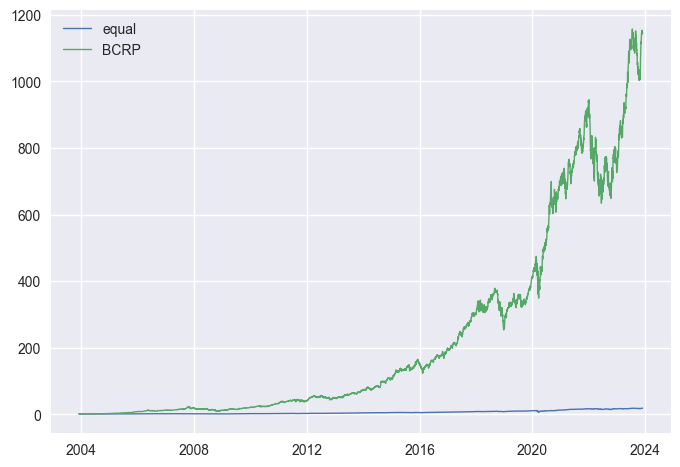

In [133]:

plt.figure()
# plt.plot(df.index, arr_pfl[:-1], linewidth=0.5, label='OGD')
plt.plot(df.index, arr_equal[:-1], linewidth=1, label='equal')
plt.plot(df.index,arr_BCRP[:-1], linewidth=1, label='BCRP')
plt.legend(loc='best')
plt.show()

### loss function

In [134]:
df_num=df.values

In [135]:
def minstrategy_regret(df_num):
    x=cp.Variable(df_num.shape[1],nonneg=True)
    objective=cp.Minimize(cp.sum(-1*cp.log(1+df_num)@x))
    constrains=[cp.sum(x)==1]
    prob=cp.Problem(objective,constrains)
    result=prob.solve(solver=cp.ECOS)
    return objective.value
xmin=minstrategy_regret(df_num[0:10])
xmin
    
    

-0.24573873747396396

In [136]:
def minstrategy_regret_x(df_num):
    x=cp.Variable(df_num.shape[1],nonneg=True)
    objective=cp.Minimize(cp.sum(-1*cp.log(1+df_num)@x))
    constrains=[cp.sum(x)==1]
    prob=cp.Problem(objective,constrains)
    result=prob.solve(solver=cp.ECOS)
    return x.value
#xmin=minstrategy_regret_x(df_num)

In [137]:
minstrategy_re=[]
for i in tqdm(range(df_num.shape[0])):
    x=minstrategy_regret(df_num[:i+1,:])
    minstrategy_re.append(x)
# minstrategy_re
    

100%|██████████| 5033/5033 [03:49<00:00, 21.93it/s]


$$
\text{Regret}=\sum_{\tau=1}^{T}\langle g,x_{\tau}\rangle-\min_{x \in X}\sum_{\tau=1}^{T}\langle g,x\rangle
$$

$$
\text{loss}=-\ln(\text{1+return})\mathbf{x}
$$
$$
\text{gradient}=-\ln (\text{1+return})
$$

### OGD

In [138]:
# begin OGD process
# import math

def OGD_update(x_old, ETA, loss, num_of_var):
    x = cp.Variable(num_of_var, nonneg=True)
    # x = cp.Variable(num_of_var, nonneg=False)
    # objective = cp.Minimize(ETA * np.array(loss) @ x + 0.5 * cp.sum((x - x_old) ** 2))
    objective = cp.Minimize(cp.norm(x_old-ETA*loss-x,2))
    constraints = [cp.sum(x) == 1]
    prob = cp.Problem(objective, constraints)
    result = prob.solve(solver='SCS')

    return x.value

def OGD_algo(df_num):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    # RSKFREE = 1.02 ** (1/365)
    ret=[]
    weight=[sum(cur_stg)]
    regre=0
    acu_regret=[]
    avg_regret=[]
    T=1
    # regret=0

    for i in tqdm(range(len(df))):
        # return of today
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_ret=np.dot(cur_stg, 1 + df_num[i,:])
        cur_pfl = cur_pfl * (cur_ret - commision_rate)
        ret.append(cur_ret)
        weight.append(np.sum(cur_stg))
       
       
        ETA=0.08

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * (np.log(df_num[i,:]+1))
        regre=regre+(direction@cur_stg)
        # regremin=minstrategy_regret(df_num[:i+1,:])
        regret=regre-minstrategy_re[i]
        # regret=regret+np.dot(direction,cur_stg)-np.dot(direction,xmin)
        acu_regret.append(regret)
        avg_regret.append(regret/T)
        T+=1
        # OGD to find strategy in the next round
        last_stg = cur_stg.copy()
        cur_stg = OGD_update(cur_stg, ETA, direction, len(df.columns))
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight,acu_regret,avg_regret

arr_pfl_OGD , arr_stg_OGD , ret_OGD, weight_OGD,acu_regret_OGD,avg_regret_OGD= OGD_algo(df_num)

  0%|          | 0/5033 [00:00<?, ?it/s]

100%|██████████| 5033/5033 [00:28<00:00, 177.14it/s]


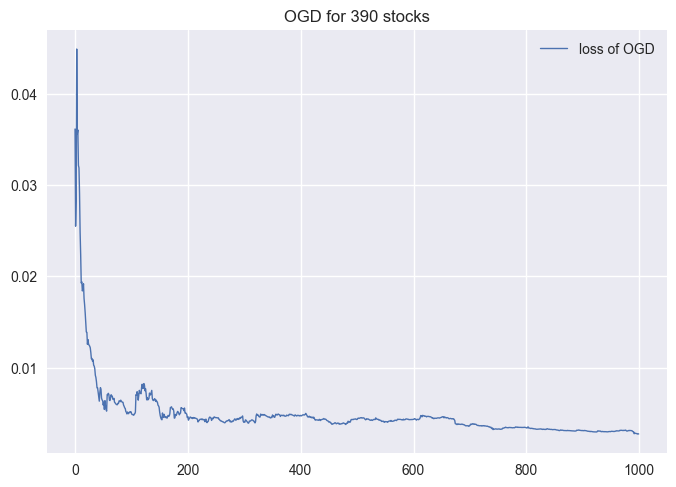

In [139]:
plt.figure()
plt.plot(avg_regret_OGD[:1000], linewidth=1, label='loss of OGD')
plt.legend(loc='best')
# plt.savefig('./result/OGD_for_390 stocks.png',bbox_inches='tight') 
plt.title('OGD for 390 stocks')
plt.show()

### OMD

In [140]:
# begin OMD process
# import math

def OMD_update(x_old, loss, num_of_var, A):
    x = cp.Variable(num_of_var, nonneg=True)
    #x = cp.Variable(num_of_var)
    objective = cp.Minimize(loss @ x + 0.5 * (x.T@A@x)-(x.T@A@x_old))
    constraints = [cp.sum(x) == 1]
    prob = cp.Problem(objective, constraints)
    result = prob.solve()

    return x.value

def OMD_algo(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    # RSKFREE = 1.02 ** (1/365)
    ret=[]
    weight=[sum(cur_stg)]
    regre=0
    acu_regret=[]
    avg_regret=[]
    T=1

    for i in tqdm(range(len(df))):
        # return of today
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_ret=np.dot(cur_stg, 1 + df_num[i,:])
        cur_pfl = cur_pfl * (cur_ret - commision_rate)
        ret.append(cur_ret)
        weight.append(np.sum(cur_stg))

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * np.log(df_num[i,:]+1)
        # OMD to find strategy in the next round
        ETA=0.5
        a=ETA+cur_stg
        A=np.diag(a)
        last_stg = cur_stg.copy()
        regre=regre+(direction@cur_stg)
        #regremin=minstrategy_regret(df_num[:i+1,:])
        regret=regre-minstrategy_re[i]
        # regret=regret+np.dot(direction,cur_stg)-np.dot(direction,xmin)
        acu_regret.append(regret)
        avg_regret.append(regret/T)
        T+=1
        cur_stg = OMD_update(cur_stg, direction, len(df.columns),A)
        arr_stg.append(cur_stg)
        

    return arr_pfl , arr_stg, ret, weight,avg_regret, acu_regret


arr_pfl_OMD , arr_stg_OMD , ret_OMD, weight_OMD,avg_regret_OMD,acu_regret_OMD= OMD_algo(df)

100%|██████████| 5033/5033 [00:48<00:00, 103.75it/s]


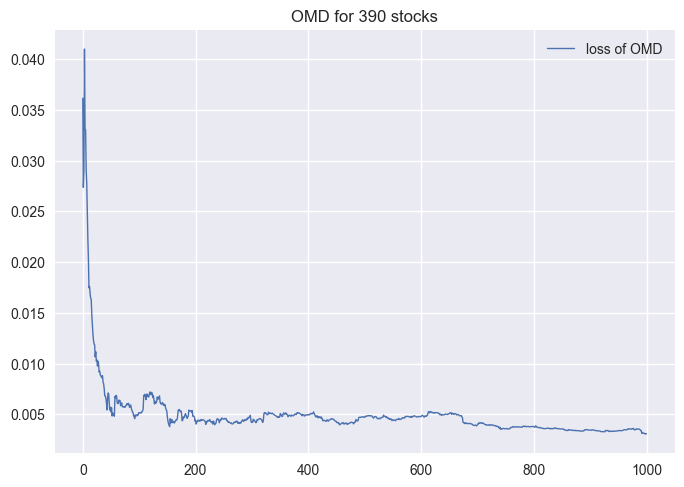

In [141]:
plt.figure()
plt.plot(avg_regret_OMD[:1000], linewidth=1, label='loss of OMD')
plt.legend(loc='best')
# plt.savefig('./result/OMD_for_390 stocks.png',bbox_inches='tight') 
plt.title('OMD for 390 stocks')
plt.show()

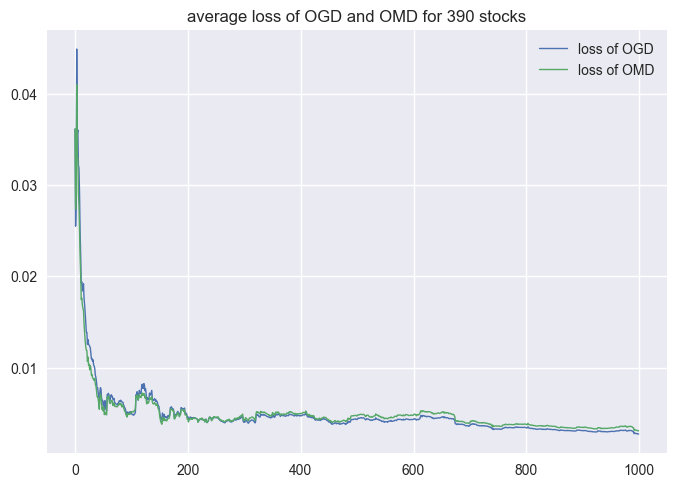

In [142]:
plt.figure()
plt.plot(avg_regret_OGD[:1000], linewidth=1, label='loss of OGD')
plt.plot(avg_regret_OMD[:1000], linewidth=1, label='loss of OMD')
plt.legend(loc='best')
# plt.savefig('./result/OGDandOMD_for_390 stocks.png',bbox_inches='tight') 
plt.title('average loss of OGD and OMD for 390 stocks')
plt.show()

### up

In [143]:

# Donot use up, It need lots of time 
# df_num=df.values
# df_num=(1+df_num)
# df_num
# import itertools
# #universal portfolio(up)
# def binnings(n, k, cache={}):
#     if n == 0:
#         return np.zeros((1, k))
#     if k == 0:
#         return np.empty((0, 0))
#     args = (n, k)
#     if args in cache:
#         return cache[args]
#     a = binnings(n - 1, k, cache)
#     a1 = a + (np.arange(k) == 0)
#     b = binnings(n, k - 1, cache)
#     b1 = np.hstack((np.zeros((b.shape[0], 1)), b))
#     result = np.vstack((a1, b1))
#     cache[args] = result
#     return result

# def portfolio_wealth(b, stock_data):
#     return np.prod(np.dot(stock_data,b))

# def up_algo(df):
#     arr_pfl = [1]
#     cur_pfl = 1
#     cur_stg = np.array([1/len(df.columns)] * len(df.columns))
#     last_stg = np.array([1/len(df.columns)] * len(df.columns))
#     arr_stg = [cur_stg]
#     COMMISSION = 1e-3
#     ret=[1]
#     weight=[sum(cur_stg)]
#     allocation_granularity = 20
#     all_portfolio_allocations = binnings(allocation_granularity, len(df.columns))
#     row_sums = all_portfolio_allocations.sum(axis=1)
#     all_portfolios = all_portfolio_allocations / row_sums[:,np.newaxis]
#     for i in tqdm(range(len(df))):
#         commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
#         current_ret=np.dot(cur_stg, df_num[i,:])- commision_rate
#         cur_pfl = cur_pfl * (current_ret- commision_rate)
#         ret.append(current_ret)
#         weight.append(np.sum(cur_stg))
#         arr_pfl.append(cur_pfl)
#         last_stg = cur_stg.copy()
#         #update
#         portfolio_weights = np.array([portfolio_wealth(x, df_num[:i,:]) for x in list(all_portfolios)])
#         weighted_portfolio = np.dot(portfolio_weights, all_portfolios)
#         cur_stg = weighted_portfolio / np.sum(portfolio_weights)

#         arr_stg.append(cur_stg)
#     return arr_pfl , arr_stg, ret, weight

        
# arr_pfl_up , arr_stg_up , ret_up, weight_up= up_algo(df)     

### buy and hold

In [144]:
#buy and hold
def buy_and_hold(df_ori):
    arr_pfl = [1]
    ret=[1]
    stg = np.array([1/len(df_ori.columns)] * len(df_ori.columns))
    arr_stg=[stg]
    units=stg/df_ori.iloc[0,:].values
    for i in range(1,len(df_ori)):
        cur_pfl=df_ori.iloc[i,:].values@units
        cur_ret=cur_pfl/arr_pfl[-1]
        cur_stg=np.multiply(df_ori.iloc[i,:].values,units)/np.dot(df_ori.iloc[i,:].values,units)
        arr_pfl.append(cur_pfl)
        arr_stg.append(cur_stg)
        ret.append(cur_ret)
    return arr_pfl,arr_stg,ret[:-1]

arr_pfl_BH,arr_stg_BH,ret_BH=buy_and_hold(df_ori)

    


### EG algorithm

In [145]:
# EG algorithm
def EG_update(x_old,loss,ETA):
    x=np.multiply(x_old,np.exp(-1*loss*ETA)/np.dot(x_old,np.exp(-1*loss*ETA)))
    return x
                  
def EG_algo(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 1e-3
    ret=[]
    weight=[sum(cur_stg)]
    ETA=10

    regre=0
    acu_regret=[]
    avg_regret=[]
    T=1

    for i in tqdm(range(len(df))):
        # return of today
       
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_pfl = cur_pfl * (np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        ret.append(np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        weight.append(np.sum(cur_stg))

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * np.log(np.array(df.iloc[i,:].values)+1)
        last_stg = cur_stg.copy()

        regre=regre+(direction@cur_stg)
        #regremin=minstrategy_regret(df_num[:i+1,:])
        regret=regre-minstrategy_re[i]
        # regret=regret+np.dot(direction,cur_stg)-np.dot(direction,xmin)
        acu_regret.append(regret)
        avg_regret.append(regret/T)
        T+=1
        
        cur_stg = EG_update(cur_stg, direction, ETA)
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight, acu_regret, avg_regret

arr_pfl_EG , arr_stg_EG , ret_EG, weight_EG, acu_regret_EG, avg_regret_EG = EG_algo(df)  

100%|██████████| 5033/5033 [00:00<00:00, 9361.74it/s]


### RM algorithms

In [146]:
#RM algorithms
def RM_update(regret_old,x_old,loss):
    regret=(regret_old)+(np.dot(loss,x_old)-loss)
    x=np.maximum(regret,0)/np.sum(np.maximum(regret,0))
    return regret, x

def RM_algo(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 1e-3
    ret=[]
    weight=[sum(cur_stg)]
    
    regret_old=0
    flag=1

    regre=0
    acu_regret=[]
    avg_regret=[]
    T=1

    for i in tqdm(range(len(df))):
        # return of today
       
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_pfl = cur_pfl * (np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        ret.append(np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        weight.append(np.sum(cur_stg))


        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * np.log(np.array(df.iloc[i,:].values)+1)
        last_stg = cur_stg.copy()

        regre=regre+(direction@cur_stg)
        #regremin=minstrategy_regret(df_num[:i+1,:])
        regret=regre-minstrategy_re[i]
        # regret=regret+np.dot(direction,cur_stg)-np.dot(direction,xmin)
        acu_regret.append(regret)
        avg_regret.append(regret/T)
        T+=1
     
        regret_old,cur_stg = RM_update(regret_old,cur_stg ,direction)

        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight, acu_regret, avg_regret

arr_pfl_RM , arr_stg_RM , ret_RM, weight_RM, acu_regret_RM, avg_regret_RM = RM_algo(df)  


100%|██████████| 5033/5033 [00:00<00:00, 8897.11it/s] 


In [147]:
#RM+ algorithms
def RMPLUS_update(regret_old,x_old,loss):
    regret=np.maximum(regret_old+(np.dot(loss,x_old)-loss),0)
    x=regret/np.sum(regret)
    return regret, x

def RMPLUS_algo(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 1e-3
    ret=[]
    weight=[sum(cur_stg)]
    ETA=1.2
    regret_old=0

    regre=0
    acu_regret=[]
    avg_regret=[]
    T=1

    for i in tqdm(range(len(df))):
        # return of today
       
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_pfl = cur_pfl * (np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        ret.append(np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        weight.append(np.sum(cur_stg))

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * np.log(np.array(df.iloc[i,:].values)+1)
        last_stg = cur_stg.copy()

        regre=regre+(direction@cur_stg)
        #regremin=minstrategy_regret(df_num[:i+1,:])
        regret=regre-minstrategy_re[i]
        # regret=regret+np.dot(direction,cur_stg)-np.dot(direction,xmin)
        acu_regret.append(regret)
        avg_regret.append(regret/T)
        T+=1
        
        regret_old,cur_stg = RMPLUS_update(regret_old,cur_stg ,direction)
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight, acu_regret, avg_regret
arr_pfl_RMPLUS, arr_stg_RMPLUS , ret_RMPLUS, weight_RMPLUS, acu_regret_PMPLUS, avg_regret_RMPLUS = RMPLUS_algo(df)  

100%|██████████| 5033/5033 [00:00<00:00, 11606.88it/s]


### market cap strategy

In [148]:
import yfinance as yf
def get_outstanding(df):    
    ticker=list(df.columns)
    outstanding=[]
    for i in tqdm(ticker[:-1]):
        stock=yf.Ticker(i)
        info=stock.info
        shares_outstanding = info.get('sharesOutstanding', 'No data')
        outstanding.append(shares_outstanding)
    return pd.DataFrame([outstanding],columns=ticker[:-1])
outstanding_df=get_outstanding(df)
outstanding=outstanding_df.values
market_cap=df_ori.values*outstanding
share=market_cap/np.sum(market_cap,axis=1)[:,np.newaxis]
arr_stg_MC=share
ret=np.sum(df_num[:,:-1]*share[:-1,:],axis=1)
ret_MC=ret+1
arr_pfl_MC=np.cumprod(1+ret)
arr_stg_MC.shape

    

100%|██████████| 200/200 [00:19<00:00, 10.20it/s]


(5034, 200)

### Nested OGD

In [149]:
algo_name=['euqally_weight','OGD',"OMD",'buyandhold','EG','RM','RM+','market_cap']
algos_ret=(np.array([ret_EW,ret_OGD,ret_OMD,ret_BH,ret_EG,ret_RM,ret_RMPLUS,ret_MC]).T)-1


In [150]:
algos_minstrategy_re=[]
for i in tqdm(range(algos_ret.shape[0])):
    x=minstrategy_regret(algos_ret[:i+1,:])
    algos_minstrategy_re.append(x)
algos_minstrategy_re

100%|██████████| 5033/5033 [03:55<00:00, 21.37it/s]


[-0.03316424620181359,
 -0.04491609617888369,
 -0.08164536013948968,
 -0.1712794295987226,
 -0.17618660034920958,
 -0.20920194719281693,
 -0.21460006588230288,
 -0.2554758881536974,
 -0.266397942066258,
 -0.24573873747396396,
 -0.24834459974599735,
 -0.23524684790393882,
 -0.269587749484346,
 -0.274036479244252,
 -0.3027884029438397,
 -0.33193433636792913,
 -0.32231310436694094,
 -0.33013746382129927,
 -0.34205648817219014,
 -0.33492215758839444,
 -0.3253297671876532,
 -0.33730588973331954,
 -0.33253261545843726,
 -0.3585081337375302,
 -0.36373919219679623,
 -0.3809809549775311,
 -0.386662811309838,
 -0.39793057800247805,
 -0.3889265867935317,
 -0.38496171686230785,
 -0.39737018412604763,
 -0.4079641237094135,
 -0.42610146669037985,
 -0.4206399363739928,
 -0.4264143271894285,
 -0.42435188975601085,
 -0.41459758777471856,
 -0.4062988073788336,
 -0.38211993485404067,
 -0.36257907399964573,
 -0.37013402740430434,
 -0.3608279674930635,
 -0.3493501994898568,
 -0.3175566605418523,
 -0.366722

In [151]:
def NestedOGD_algo(algos_ret):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/algos_ret.shape[1]] * algos_ret.shape[1])
    last_stg = np.array([1/algos_ret.shape[1]] * algos_ret.shape[1])
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    # RSKFREE = 1.02 ** (1/365)
    ret=[]
    weight=[sum(cur_stg)]
    regre=0
    acu_regret=[]
    avg_regret=[]
    T=1
    # regret=0

    for i in tqdm(range(len(algos_ret))):
        # return of today
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_ret=np.dot(cur_stg, 1 + algos_ret[i,:])
        cur_pfl = cur_pfl * (cur_ret - commision_rate)
        ret.append(cur_ret)
        weight.append(np.sum(cur_stg))
        
        
        ETA=0.5

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * (np.log(algos_ret[i,:]+1))
        regre=regre+(direction@cur_stg)
        # regremin=minstrategy_regret(algos_ret[:i+1,:])
        regret=regre-algos_minstrategy_re[i]
        # regret=regret+np.dot(direction,cur_stg)-np.dot(direction,xmin)
        acu_regret.append(regret)
        avg_regret.append(regret/T)
        T+=1
        # OGD to find strategy in the next round
        last_stg = cur_stg.copy()
        cur_stg = OGD_update(cur_stg, ETA, direction, algos_ret.shape[1])
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight,acu_regret,avg_regret

arr_pfl_NOGD , arr_stg_NOGD , ret_NOGD, weight_NOGD,acu_regret_NOGD,avg_regret_NOGD= NestedOGD_algo(algos_ret)
    

  0%|          | 0/5033 [00:00<?, ?it/s]

100%|██████████| 5033/5033 [00:13<00:00, 385.39it/s]


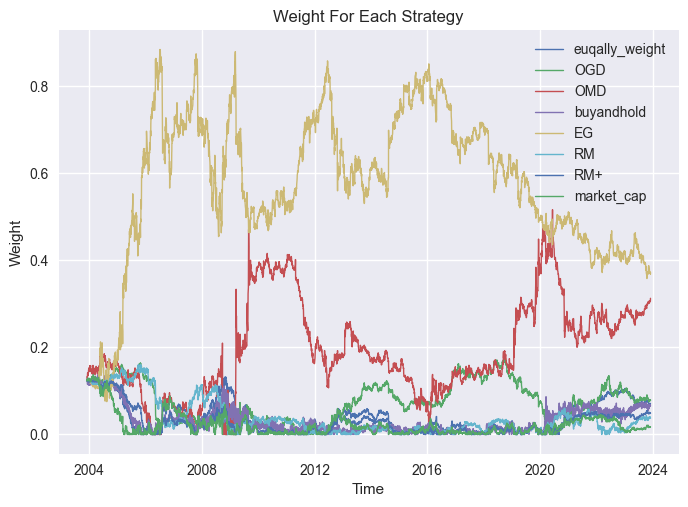

In [152]:
arr_stg = pd.DataFrame( arr_stg_NOGD[1:], columns=algo_name)

plt.figure()
for stk in arr_stg.columns:
    plt.plot(df.index,arr_stg.loc[:,stk], linewidth=1,label=stk)
    #plt.legend(loc='best')

#plt.plot(df.index, arr_stg.loc[:,'cash'], linewidth=1, label=stk)
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Weight')
plt.title('Weight For Each Strategy')
plt.show()

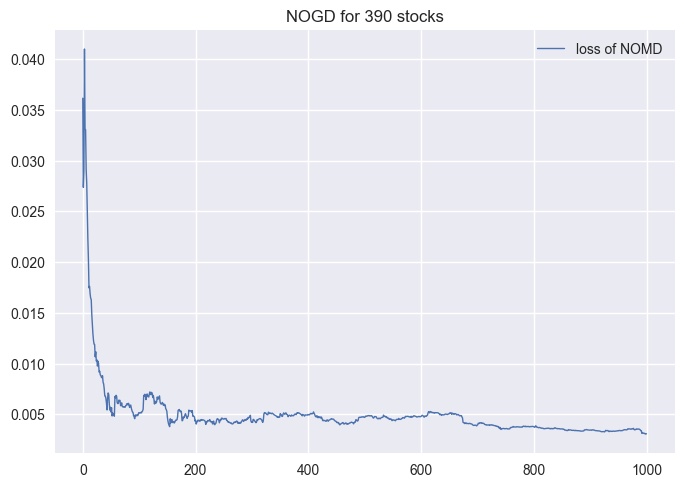

In [153]:
plt.figure()
plt.plot(avg_regret_OMD[:1000], linewidth=1, label='loss of NOMD')
plt.legend(loc='best')
#plt.savefig('./result/OMD_for_390 stocks.png',bbox_inches='tight') 
plt.title('NOGD for 390 stocks')
plt.show()

### Graph

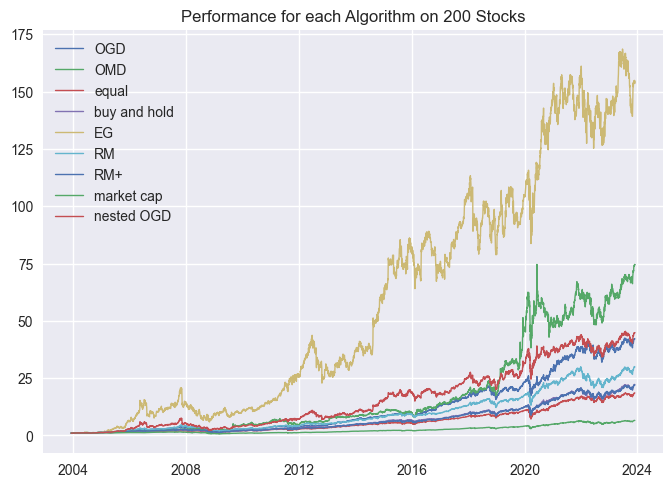

In [159]:
plt.figure()
plt.plot(df.index, arr_pfl_OGD[:-1], linewidth=1, label='OGD')
plt.plot(df.index, arr_pfl_OMD[:-1], linewidth=1, label='OMD')
# plt.plot(df.index, arr_BCRP[1:], linewidth=1, label='BCRP')
plt.plot(df.index,arr_equal[:-1], linewidth=1, label='equal')
# #plt.plot(df.index, arr_pfl_up, linewidth=1, label='up')
plt.plot(df.index, arr_pfl_BH[:-1], linewidth=1, label='buy and hold')
plt.plot(df.index, arr_pfl_EG[:-1], linewidth=1, label='EG')
plt.plot(df.index,arr_pfl_RM[:-1], linewidth=1, label='RM')
plt.plot(df.index,arr_pfl_RMPLUS[:-1], linewidth=1, label='RM+')
plt.plot(df.index,arr_pfl_MC, linewidth=1, label='market cap')
plt.plot(df.index,arr_pfl_NOGD[:-1], linewidth=1, label='nested OGD')
plt.legend(loc='best')
plt.title('Performance for each Algorithm on %s Stocks' % (NUM))
plt.savefig('./result/my_figure_%s.png' % (NUM),bbox_inches='tight') 
plt.show()

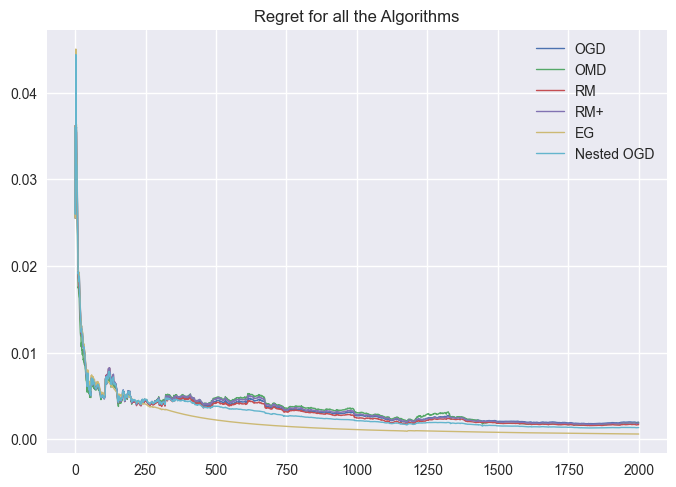

In [155]:
plt.figure()
plt.plot(avg_regret_OGD[:2000], linewidth=1, label='OGD')
plt.plot(avg_regret_OMD[:2000], linewidth=1, label='OMD')
plt.plot(avg_regret_RM[:2000], linewidth=1, label='RM')
plt.plot(avg_regret_RMPLUS[:2000], linewidth=1, label='RM+')
plt.plot(avg_regret_EG[:2000], linewidth=1, label='EG')
plt.plot(avg_regret_NOGD[:2000], linewidth=1, label='Nested OGD')
plt.legend(loc='best')
plt.title('Regret for all the Algorithms')
plt.savefig('./result/Regret_%d_stocks.png' % (NUM),bbox_inches='tight') 
plt.show()

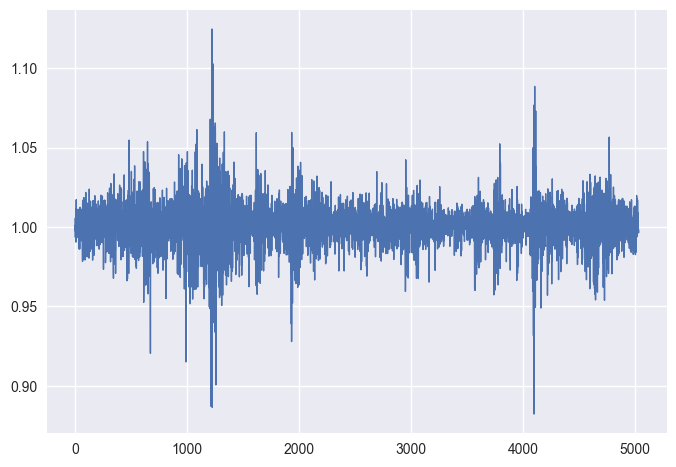

In [156]:
plt.figure()
plt.plot(ret_RM[1:], linewidth=1, label='OGD')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


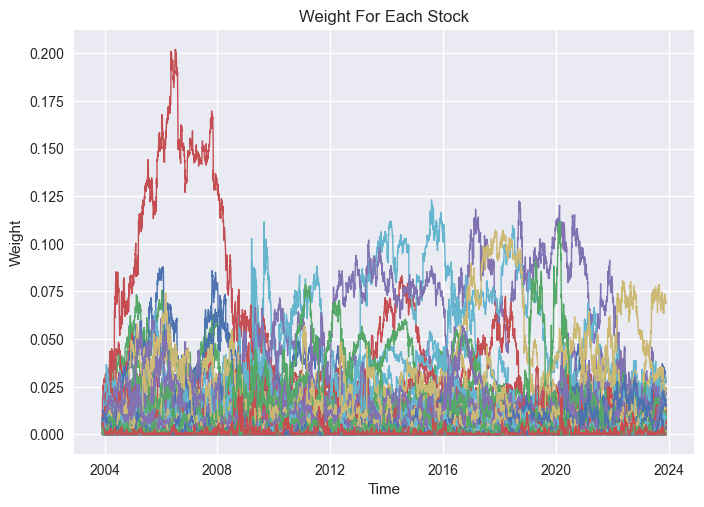

In [157]:
arr_stg = pd.DataFrame( arr_stg_OGD[1:], columns=df.columns)

plt.figure()
for stk in arr_stg.columns:
    plt.plot(df.index,arr_stg.loc[:,stk], linewidth=1)
    #plt.legend(loc='best')

#plt.plot(df.index, arr_stg.loc[:,'cash'], linewidth=1, label=stk)
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Weight')
plt.title('Weight For Each Stock')
plt.show()

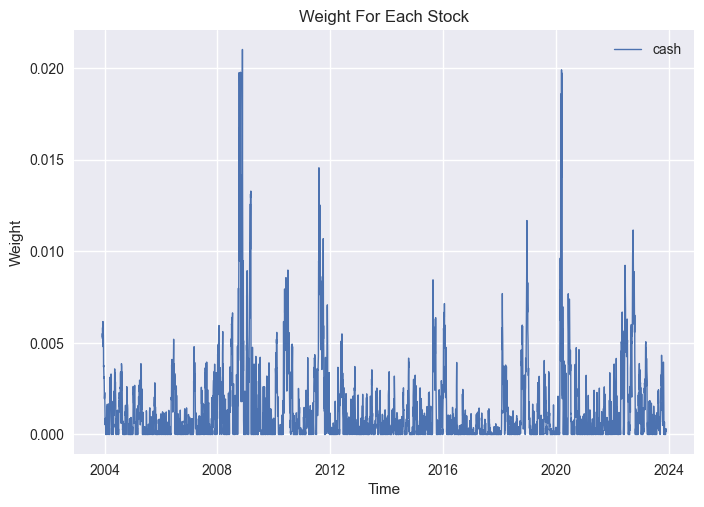

In [158]:
plt.figure()
plt.plot(df.index, arr_stg.loc[:,'cash'], linewidth=1, label=stk)
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Weight')
plt.title('Weight For Each Stock')
plt.show()